In [3]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

import datetime
import pandas_datareader.data as web
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
f = web.DataReader("F", 'yahoo', start, end)

### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [4]:
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,8.201456,60855800
2010-01-05,10.45,11.24,10.40,10.96,8.743967,215620200
2010-01-06,11.21,11.46,11.13,11.37,9.071067,200070600
2010-01-07,11.46,11.69,11.32,11.66,9.302429,130201700
2010-01-08,11.67,11.74,11.46,11.69,9.326366,130463000


### Plot the high and low values of Yahoo's stock for July and August 2012

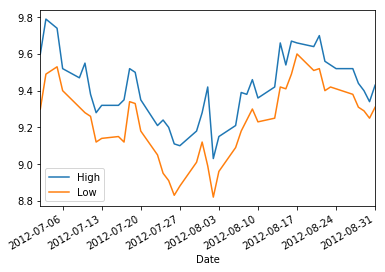

In [5]:
# %load snippets/prac1.py
f['2012-07':'2012-08'][['High','Low']].plot()

### Is the variance of the trading volume relatively stable over time?

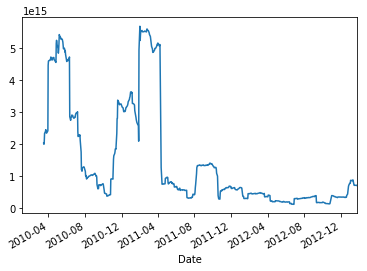

In [6]:
# %load snippets/prac2.py
f['Volume'].rolling(window=50).var().plot()

### Is the expanding window variance of the trading volume relatively stable over time?

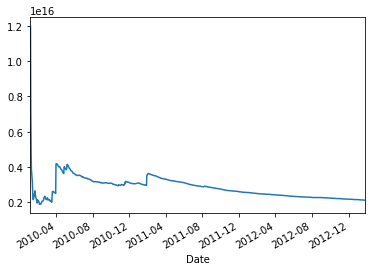

In [7]:
# %load snippets/prac3.py
f['Volume'].expanding().var().plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [9]:
# %load snippets/prac4.py
len(f[f.Close>f.Open])

352

### And did the 'up' days become more or less frequent over time?

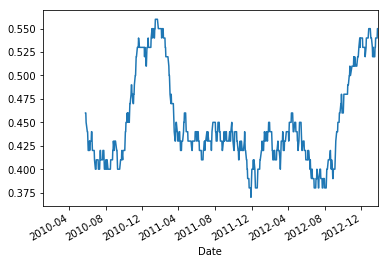

In [13]:
# %load snippets/prac5.py
f['Day Gain'] = f.Close - f.Open
f['Day Gain'].rolling(window=100).apply(lambda x: len([x_i for x_i in x if x_i>0])/len(x)).plot()

### Compute and plot the mean monthly High value of the stock

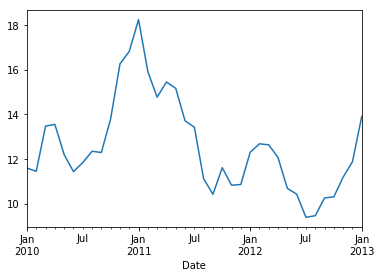

In [14]:
# %load snippets/prac6.py
f['High'].resample('M').mean().plot()

### Explore the variance of the differenced volume

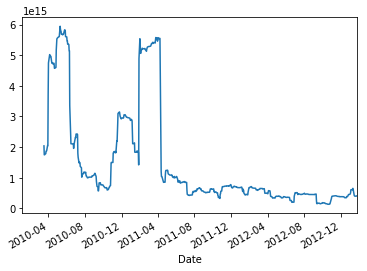

In [15]:
# %load snippets/prac7.py
volume = f.Volume
lag = f.Volume.shift()
diff = volume-lag
diff.rolling(window=50).var().plot()

### Does the lagged time series correlate with itself?

In [17]:
# %load snippets/prac8.py
# What's the best predictor of tomorrow's stock price?
pd.DataFrame({'real':f.Volume,'lag':f.Volume.shift()}).corr()

,lag,real
lag,1.000000,0.656441
real,0.656441,1.000000
